In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15,6

In [2]:
dt = pd.read_csv(r"E:\Academics\End To End Projects ML\Project Files\PRJ Sales Forecasting\Sales Forecast.csv")

In [3]:
dt.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dt.shape

(8523, 12)

In [5]:
dt.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
dt.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
dt.apply(lambda x: len(x.unique())) 

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
dt.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
cat_col = []

for x in dt.dtypes.index:
    if dt.dtypes[x] == "object":
        cat_col.append(x)

cat_col


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
cat_col.remove("Item_Identifier")
cat_col.remove("Outlet_Identifier")

In [12]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
for col in cat_col:
    print(col, len(dt[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [ ]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print("*" * 50)

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2

In [15]:
miss_bool = dt["Item_Weight"].isnull()

In [16]:
dt["Item_Weight"].isnull().sum()

np.int64(1463)

In [ ]:
item_weight_null = dt[dt["Item_Weight"].isna()]
item_weight_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [18]:
item_weight_null["Item_Identifier"].value_counts()

Item_Identifier
FDC14    2
FDV20    2
FDH10    2
FDW39    2
FDN34    2
        ..
FDS32    1
FDL10    1
FDT24    1
FDY28    1
FDC37    1
Name: count, Length: 1142, dtype: int64

In [ ]:
item_weight_mean = dt.pivot_table(values= "Item_Weight", index="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [20]:
for i, item in enumerate(dt["Item_Identifier"]):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt["Item_Weight"][i] = item_weight_mean.loc[item]["Item_Weight"]
        else:
            dt["Item_Weight"][i] = np.mean(dt["Item_Weight"])

In [21]:
dt["Item_Weight"].isnull().sum()

np.int64(0)

In [22]:
dt.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [23]:
dt.groupby("Outlet_Size").agg({"Outlet_Size": np.size})

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [24]:
dt["Outlet_Size"].isnull().sum()

np.int64(2410)

In [25]:
outlet_size_null = dt[dt["Outlet_Size"].isna()]
outlet_size_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [26]:
outlet_size_null["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [27]:
result= dt.groupby (["Outlet_Type","Outlet_Size"] ).agg({"Outlet_Type":[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [28]:
outlet_size_mode = dt.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [29]:
miss_bool = dt["Outlet_Size"].isnull()
dt.loc[miss_bool, "Outlet_Size"] = dt.loc[miss_bool, "Outlet_Type"].apply(lambda x: outlet_size_mode[x])


In [30]:
display (dt["Outlet_Size"].isnull().sum())

np.int64(0)

In [31]:
result= dt.groupby (["Outlet_Type","Outlet_Size"] ).agg({"Outlet_Type":["size"]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [32]:
sum(dt["Item_Visibility"] == 0)

526

In [33]:
dt.loc[:, "Item_Visibility"].replace([0], [dt["Item_Visibility"].mean()], inplace=True)

In [34]:
sum(dt["Item_Visibility"] == 0)

0

In [35]:
dt["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [36]:
dt["Item_Fat_Content"] = dt["Item_Fat_Content"].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})

In [37]:
dt["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [38]:
dt["New_item_Type"] = dt["Item_Identifier"].apply(lambda x : x[:2])

In [39]:
dt["New_item_Type"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_item_Type, Length: 8523, dtype: object

In [40]:
dt["New_item_Type"].value_counts()

New_item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [41]:
dt["New_item_Type"] = dt["New_item_Type"].map({"FD": "Food", "NC":"Non-Consumable", "DR":"Drinks"})

In [42]:
dt["New_item_Type"].value_counts()

New_item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [43]:
dt.groupby(["New_item_Type", "Item_Fat_Content"]).agg({"Outlet_Type": [np.size]})

Outlet_Type
                                       size
New_item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [44]:
dt.loc[dt["New_item_Type"] == "Non-Consumable", "Item_Fat_Content"] = "Non-Edible"

In [45]:
dt["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [46]:
dt.groupby(["New_item_Type", "Item_Fat_Content"]).agg({"Outlet_Type": [np.size]})

Outlet_Type
                                       size
New_item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [47]:
dt["Outlet_Years"] = 2024 - dt["Outlet_Establishment_Year"]

In [48]:
dt["Outlet_Years"]

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64

In [49]:
dt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,25
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,26
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,Food,22
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,15


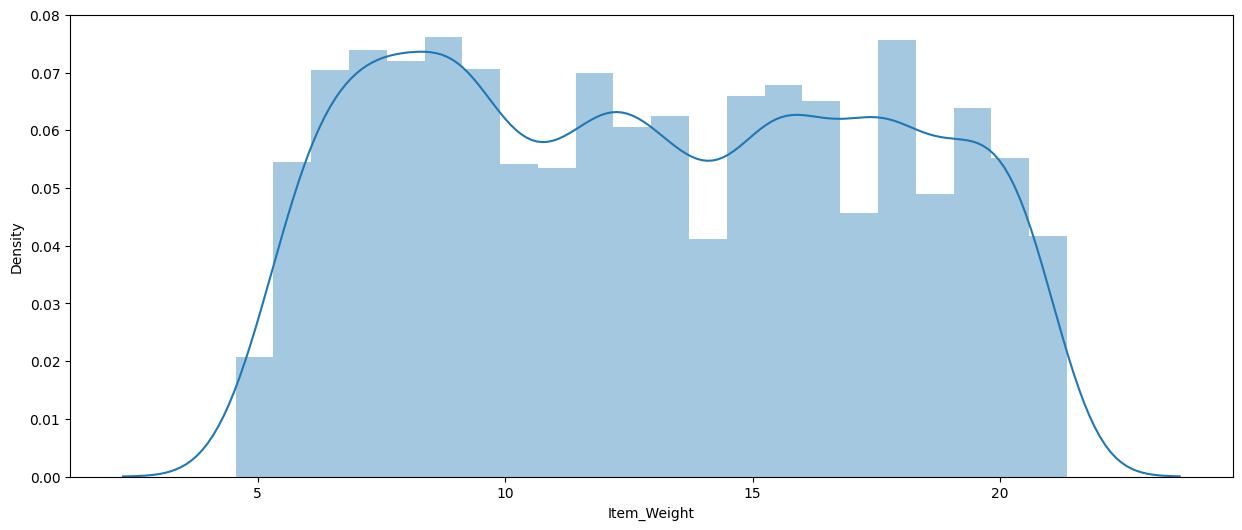

In [50]:
sns.distplot(dt["Item_Weight"])
plt.show()

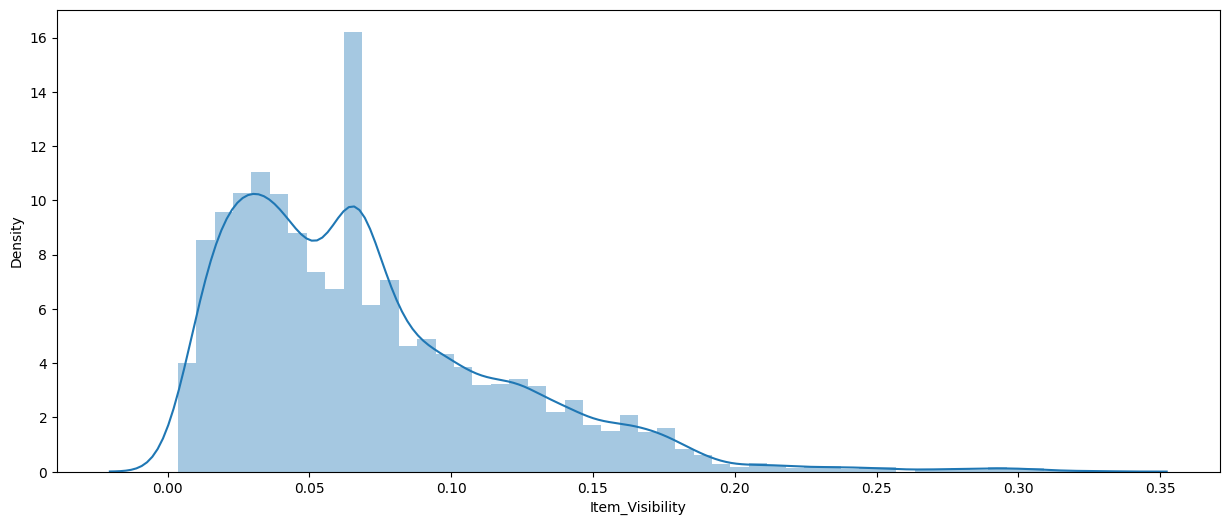

In [51]:
sns.distplot(dt["Item_Visibility"])
plt.show()

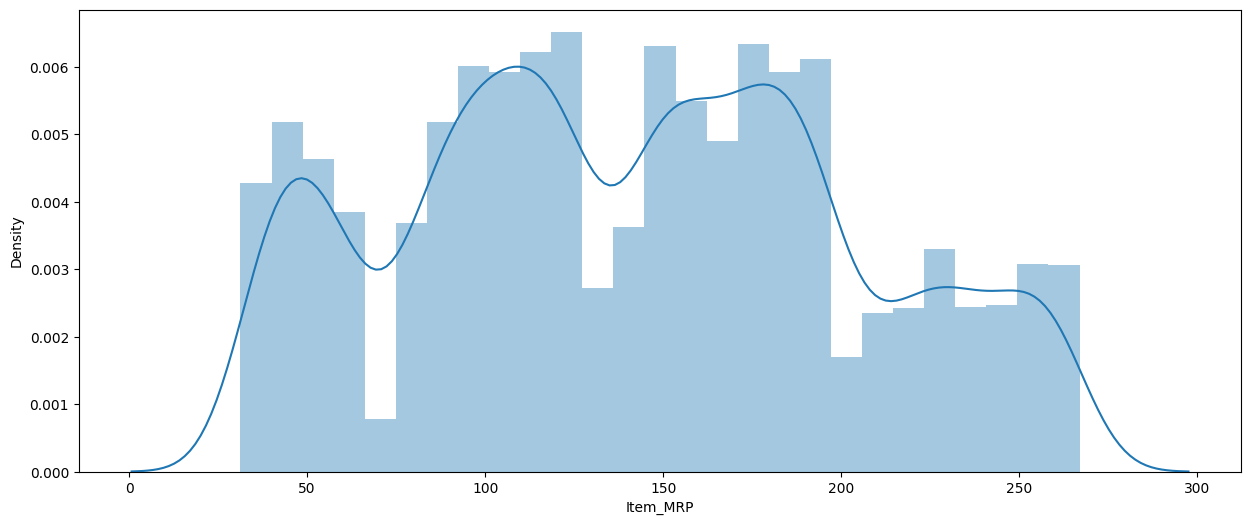

In [52]:
sns.distplot(dt["Item_MRP"])
plt.show()

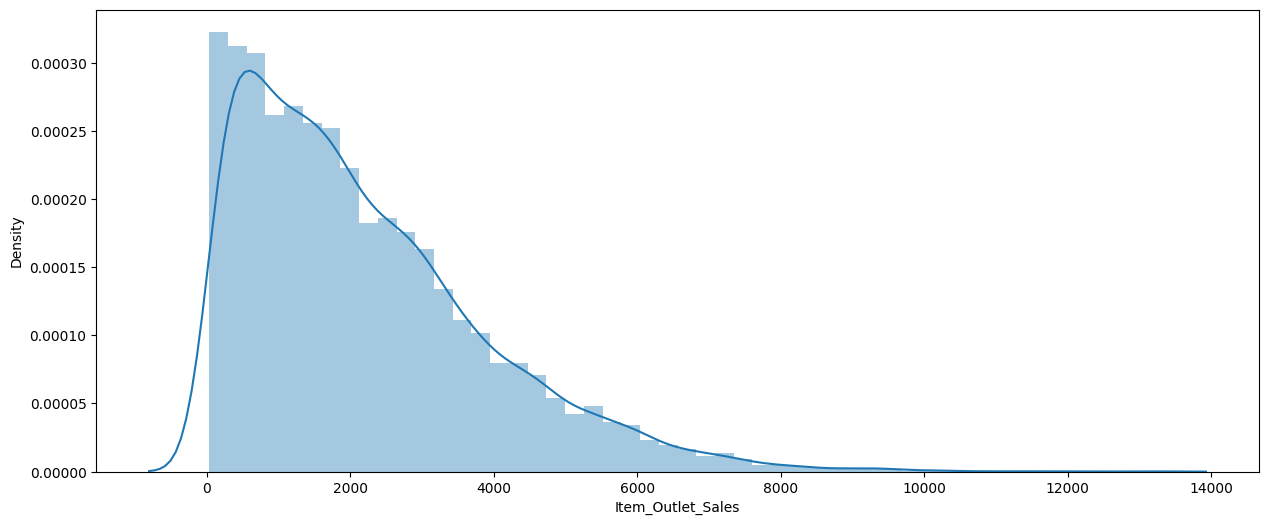

In [53]:
sns.distplot(dt["Item_Outlet_Sales"])
plt.show()

In [54]:
dt["Item_Outlet_Sales"] = np.log(1+dt["Item_Outlet_Sales"])
dt["Item_Outlet_Sales"]

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

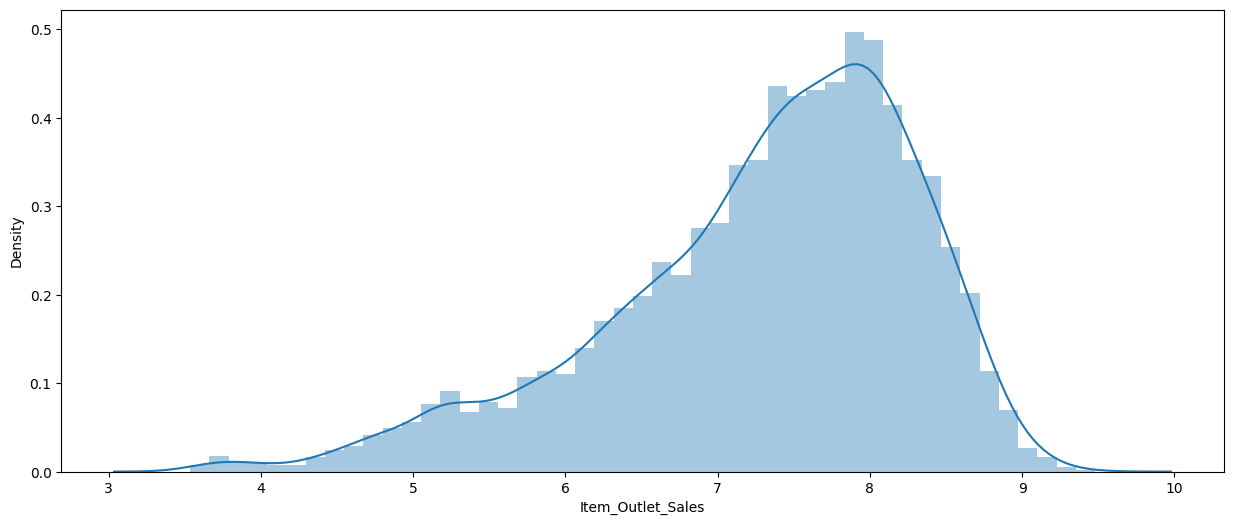

In [55]:
sns.distplot(dt["Item_Outlet_Sales"])
plt.show()

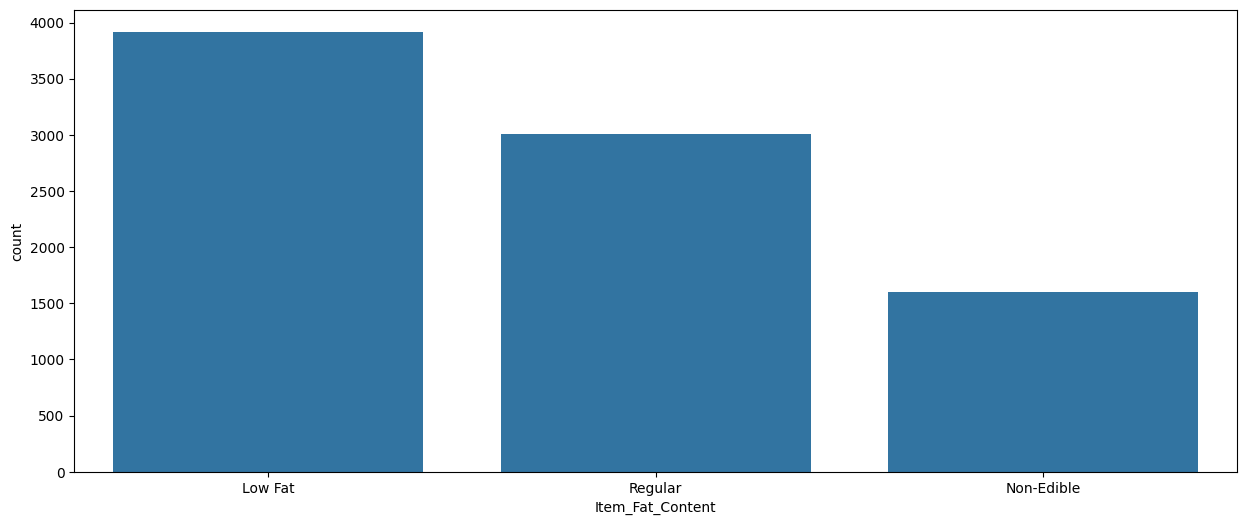

In [56]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()


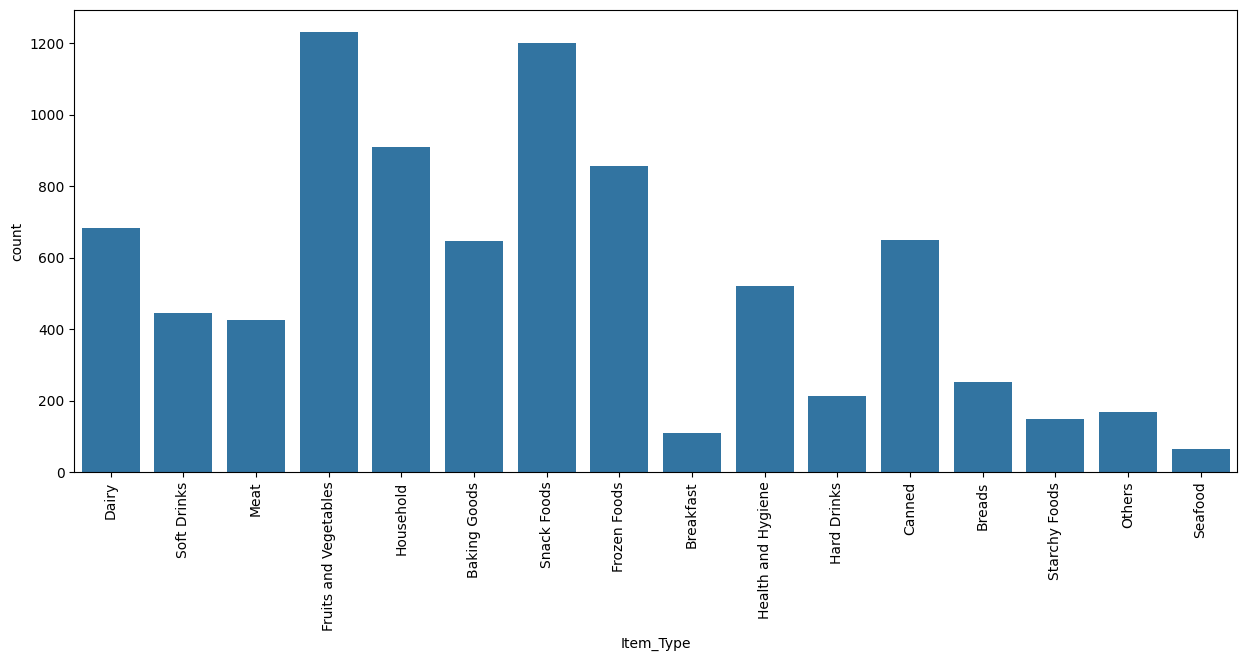

In [57]:
l = list(dt["Item_Type"].unique())
chart = sns.countplot(x=dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()

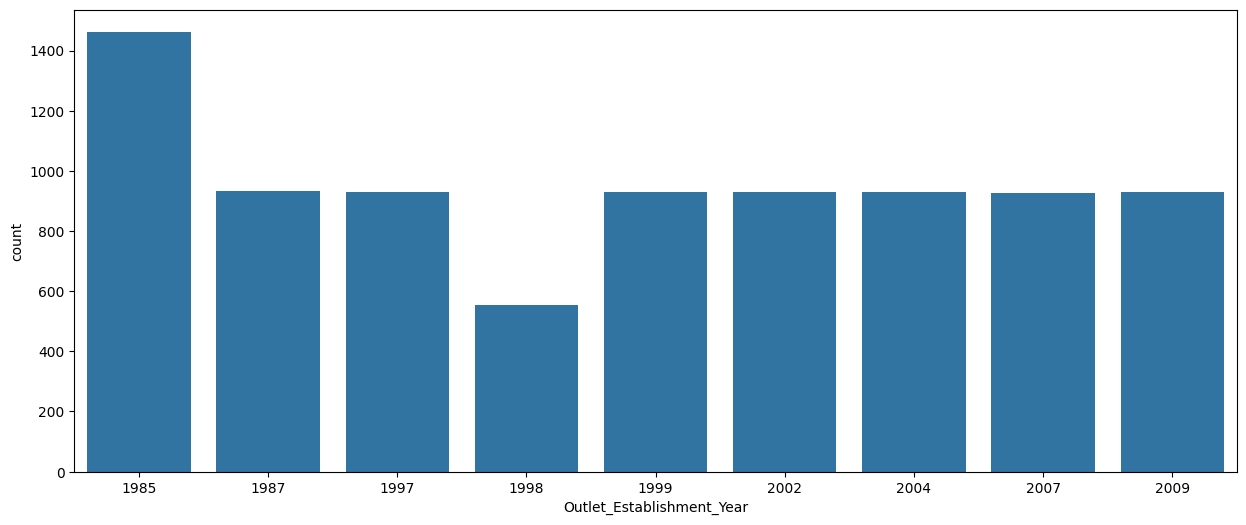

In [58]:
sns.countplot(x=dt["Outlet_Establishment_Year"])
plt.show()

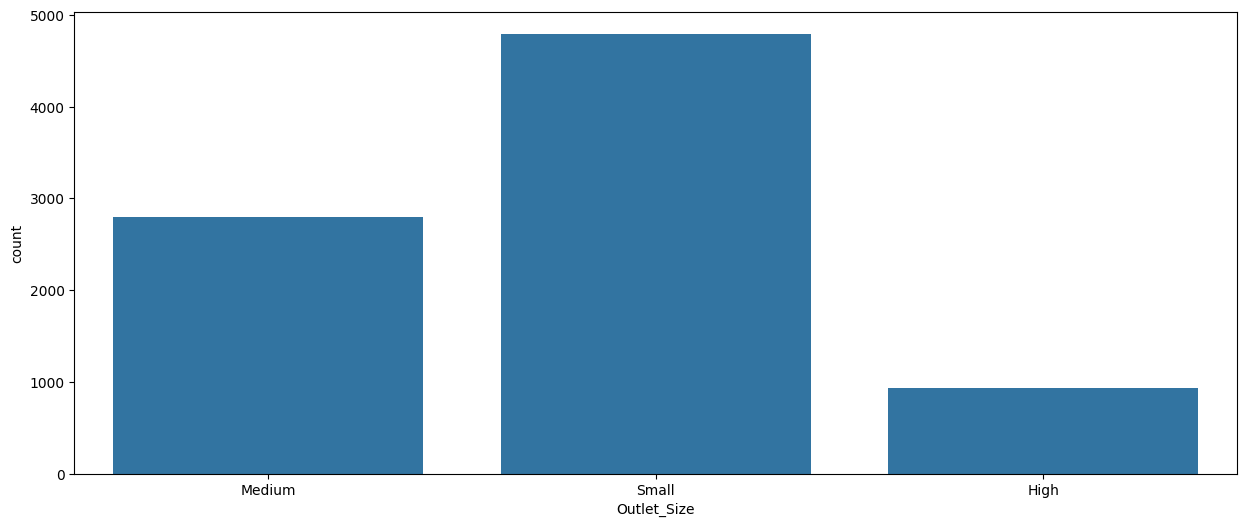

In [59]:
sns.countplot(x=dt["Outlet_Size"])
plt.show()

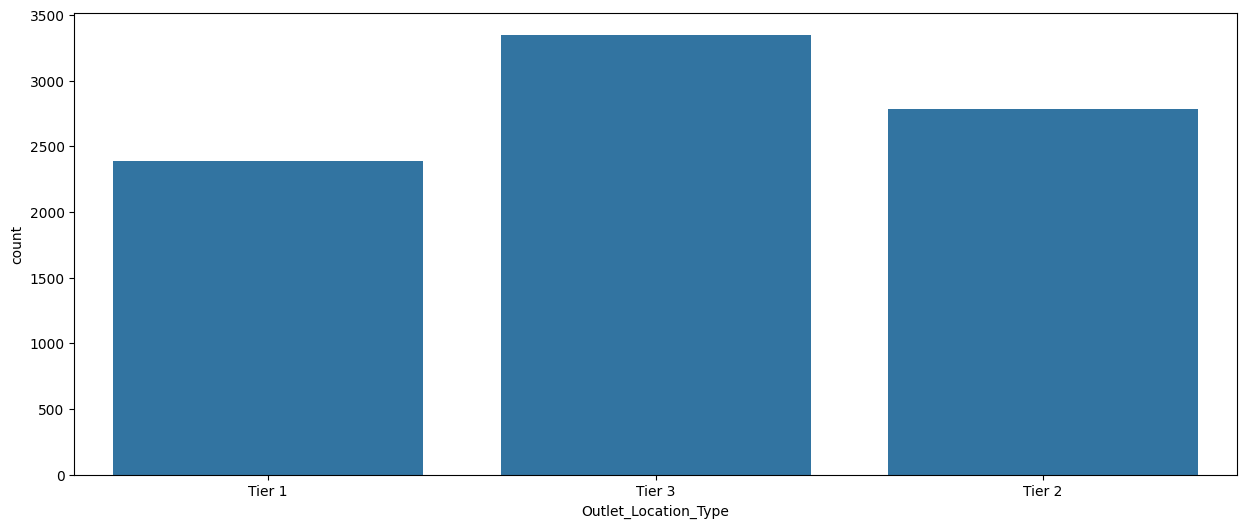

In [60]:
sns.countplot(x=dt["Outlet_Location_Type"])
plt.show()

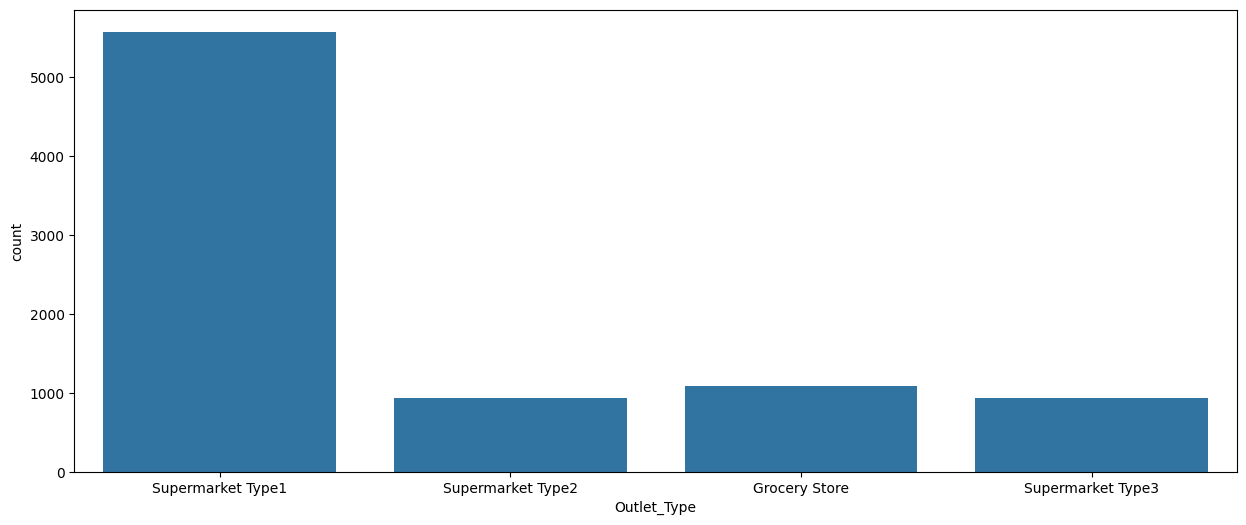

In [61]:
sns.countplot(x=dt["Outlet_Type"])
plt.show()

In [62]:
dt.corr(numeric_only=True)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017477,0.025972,-0.013418,0.007675,0.013418
Item_Visibility,-0.017477,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007675,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


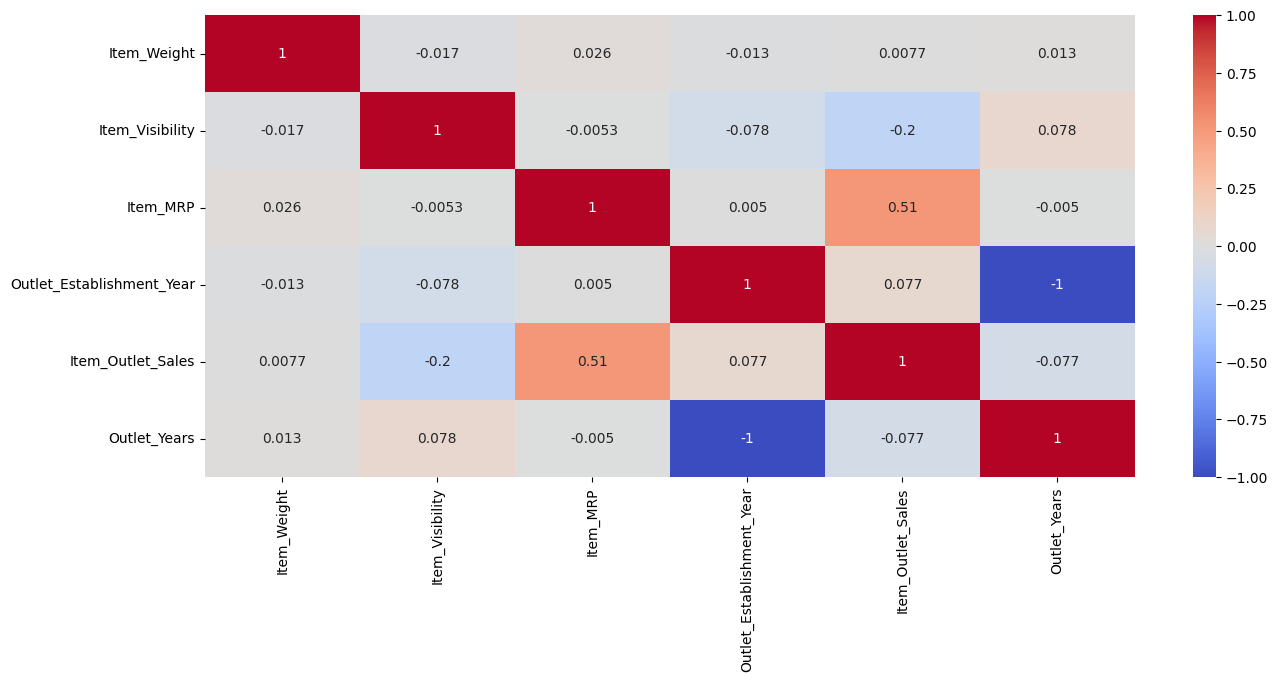

In [63]:
sns.heatmap(dt.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt["outlet"] = le.fit_transform(dt["Outlet_Identifier"])

In [65]:
dt["outlet"]

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: outlet, Length: 8523, dtype: int64

In [66]:
dt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_Type,Outlet_Years,outlet
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25,9
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15,3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25,9
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,26,0
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,7.929984,Food,37,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,6.310436,Food,22,7
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,7.085159,Non-Consumable,20,6
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.521100,Food,15,3


In [67]:
cat_col = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "New_item_Type"]

In [68]:
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
    

In [69]:
dt.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_Type,Outlet_Years,outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,25,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,15,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,25,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,26,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,37,1


In [70]:
dt = pd.get_dummies(dt, columns=["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "New_item_Type"], dtype=int)

In [71]:
dt.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_item_Type_0,New_item_Type_1,New_item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,25,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,15,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,25,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,26,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,37,1,...,0,0,1,0,1,0,0,0,0,1


In [72]:
X = dt.drop(columns=["Item_Identifier", "Outlet_Establishment_Year", "Item_Outlet_Sales", "Outlet_Identifier" ])

In [73]:
X.head(5)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_item_Type_0,New_item_Type_1,New_item_Type_2
0,9.30,0.016047,4,249.8092,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,15,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,26,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,37,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [74]:
y = dt['Item_Outlet_Sales']
display (y.head())


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [75]:
from sklearn import metrics
print(", ".join(metrics.get_scorer_names()))

accuracy, adjusted_mutual_info_score, adjusted_rand_score, average_precision, balanced_accuracy, completeness_score, d2_absolute_error_score, explained_variance, f1, f1_macro, f1_micro, f1_samples, f1_weighted, fowlkes_mallows_score, homogeneity_score, jaccard, jaccard_macro, jaccard_micro, jaccard_samples, jaccard_weighted, matthews_corrcoef, max_error, mutual_info_score, neg_brier_score, neg_log_loss, neg_mean_absolute_error, neg_mean_absolute_percentage_error, neg_mean_gamma_deviance, neg_mean_poisson_deviance, neg_mean_squared_error, neg_mean_squared_log_error, neg_median_absolute_error, neg_negative_likelihood_ratio, neg_root_mean_squared_error, neg_root_mean_squared_log_error, normalized_mutual_info_score, positive_likelihood_ratio, precision, precision_macro, precision_micro, precision_samples, precision_weighted, r2, rand_score, recall, recall_macro, recall_micro, recall_samples, recall_weighted, roc_auc, roc_auc_ovo, roc_auc_ovo_weighted, roc_auc_ovr, roc_auc_ovr_weighted, top

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [77]:
def train(model, X, y):

    print ("Train Test Split")
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print (X.shape, y.shape)
    print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)
    
    model.fit(X_train, y_train)       
   
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    
    print ('Accuracy')
    print ('Accuracy of Test data')
    y_test_pred = model.predict(X_test)
    print('R2_Score:', r2_score(y_test,y_test_pred))
    print ('Accuracy of Training data')
    y_train_pred = model.predict(X_train)
    print('R2_Score:', r2_score(y_train,y_train_pred))
    print ('Accuracy of Complete data')
    y_pred = model.predict(X)
    print('R2_Score:', r2_score(y,y_pred))
    print ()
    
    plt.subplot (212)
    print ('Display actual and predicted values')
    sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
    plt.show()


Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.29362336 -0.29855725 -0.2848808  -0.28841046 -0.28022464]
ABS Average of - neg_mean_squared_error 0.28913930069905824

R2 Score 
[0.72122305 0.7106351  0.70746092 0.71541618 0.74010375]
Average R2 Score  0.7189677985439289

Accuracy
Accuracy of Test data
R2_Score: 0.7136391970550767
Accuracy of Training data
R2_Score: 0.7232624990443841
Accuracy of Complete data
R2_Score: 0.7203110558484953

Display actual and predicted values


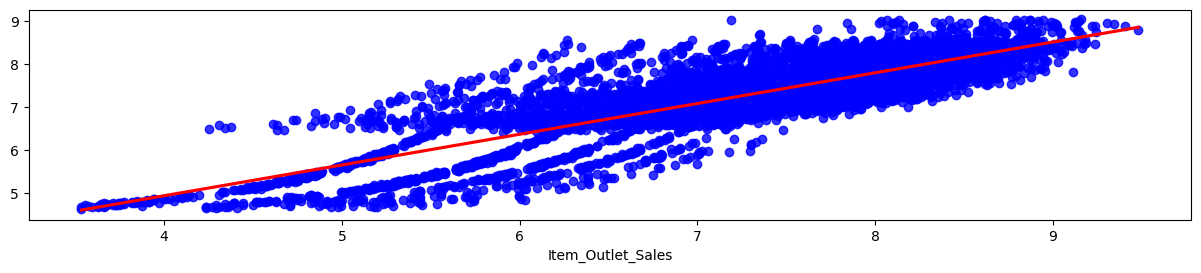

Outlet_Type_0            -1.254723
Outlet_Size_1            -0.735141
Outlet_Size_2            -0.575278
Outlet_Type_1            -0.476526
Outlet_Location_Type_2   -0.383803
Outlet_Type_2            -0.293352
Outlet_Years             -0.073229
Item_Visibility          -0.038618
New_item_Type_0          -0.026509
Item_Fat_Content_0       -0.010449
Item_Weight              -0.001516
Item_Type                 0.000923
Item_Fat_Content_2        0.005071
Item_Fat_Content_1        0.005377
New_item_Type_2           0.005377
Item_MRP                  0.008172
New_item_Type_1           0.021131
Outlet_Location_Type_1    0.030356
outlet                    0.061955
Outlet_Location_Type_0    0.353446
Outlet_Size_0             1.310419
Outlet_Type_3             2.024600
dtype: float64


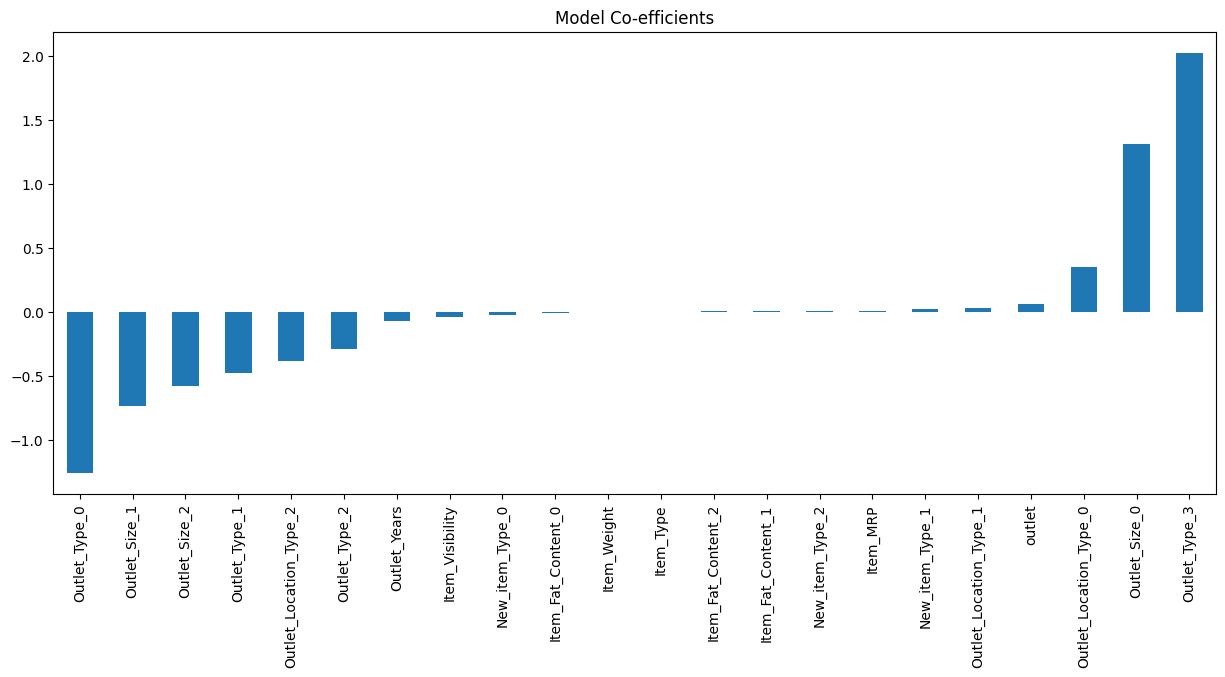

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
print(coef)
coef.plot(kind="bar", title="Model Co-efficients")
plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.2931799  -0.29900886 -0.28516812 -0.28877548 -0.28047642]
ABS Average of - neg_mean_squared_error 0.28932175794002435

R2 Score 
[0.72164409 0.71019739 0.70716587 0.715056   0.73987023]
Average R2 Score  0.7187867146748426

Accuracy
Accuracy of Test data
R2_Score: 0.7132086988032402
Accuracy of Training data
R2_Score: 0.7230806625087245
Accuracy of Complete data
R2_Score: 0.7200528916859534

Display actual and predicted values


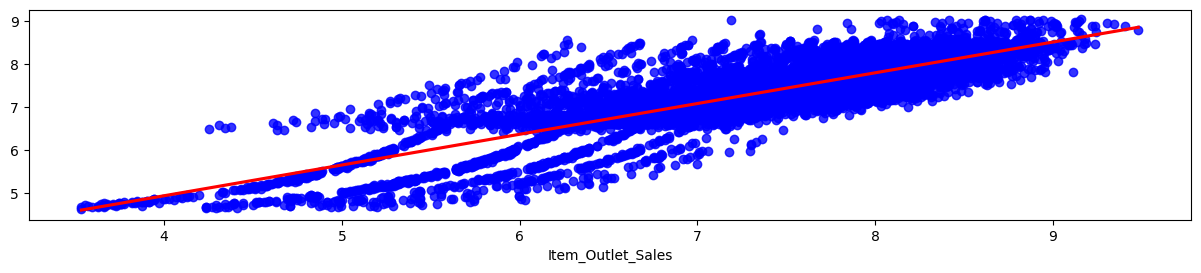

Outlet_Type_0            -1.453723
Outlet_Size_2            -0.166002
Outlet_Size_1            -0.164894
Outlet_Location_Type_2   -0.128530
Item_Visibility          -0.039514
New_item_Type_0          -0.026742
Outlet_Years             -0.019459
Item_Fat_Content_0       -0.010452
Item_Weight              -0.001522
Item_Type                 0.000941
Item_Fat_Content_2        0.005044
New_item_Type_2           0.005408
Item_Fat_Content_1        0.005408
Item_MRP                  0.008173
outlet                    0.012587
New_item_Type_1           0.021334
Outlet_Location_Type_1    0.026653
Outlet_Type_2             0.081579
Outlet_Location_Type_0    0.101877
Outlet_Type_1             0.166102
Outlet_Size_0             0.330896
Outlet_Type_3             1.206042
dtype: float64


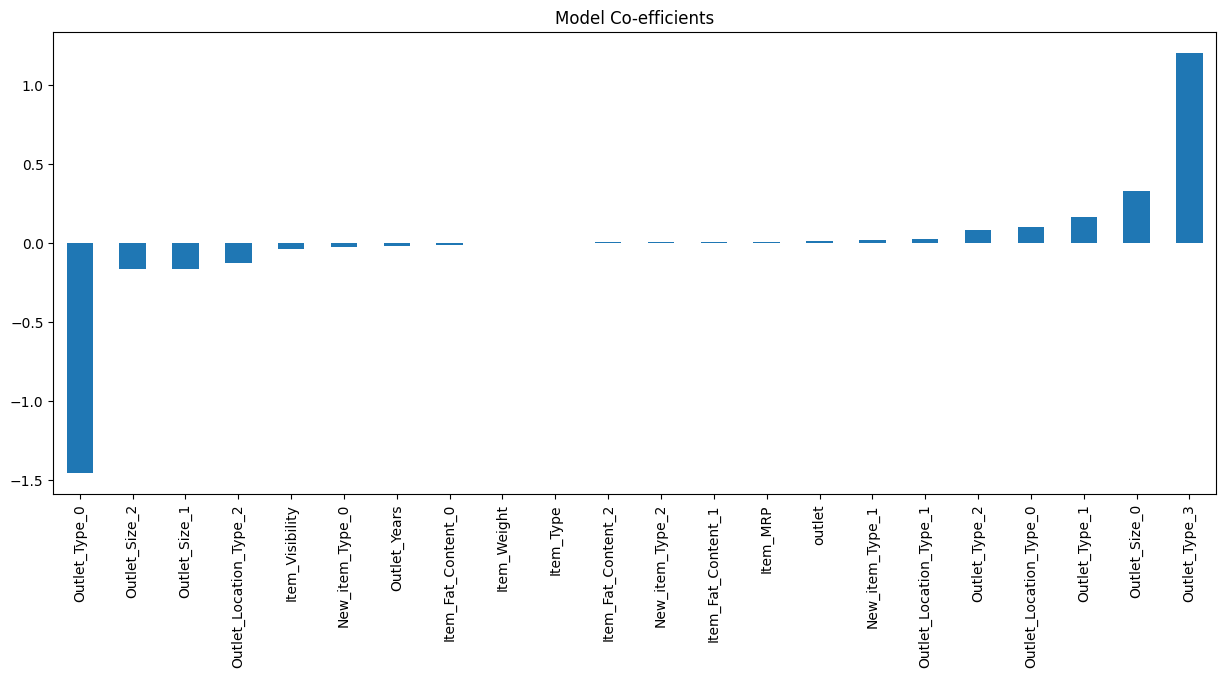

In [79]:
from sklearn.linear_model import Ridge
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
print(coef)
coef.plot(kind="bar", title="Model Co-efficients")
plt.show()


Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.76444141 -0.75797033 -0.72014686 -0.75959604 -0.81323995]
ABS Average of - neg_mean_squared_error 0.7630789166281843

R2 Score 
[0.27421086 0.26536699 0.26049386 0.2504823  0.24575506]
Average R2 Score  0.2592618151206076

Accuracy
Accuracy of Test data
R2_Score: 0.2538352830427828
Accuracy of Training data
R2_Score: 0.26227683517122646
Accuracy of Complete data
R2_Score: 0.2596923551013075

Display actual and predicted values


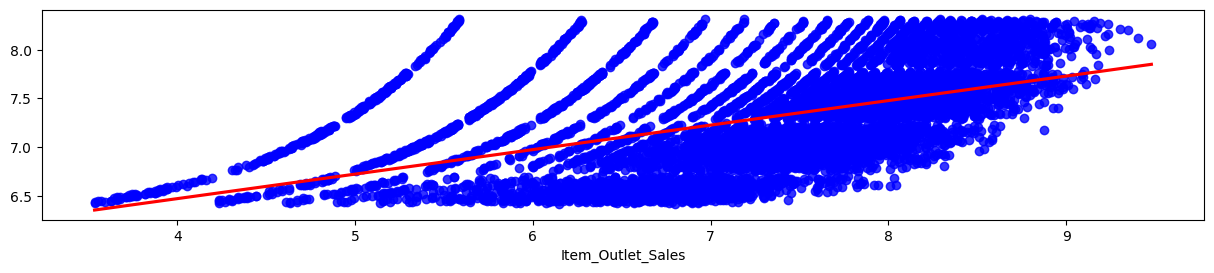

Item_Weight              -0.000000
Item_Visibility          -0.000000
Item_Type                -0.000000
Outlet_Years             -0.000000
Item_Fat_Content_0       -0.000000
outlet                    0.000000
Item_Fat_Content_1        0.000000
Item_Fat_Content_2        0.000000
Outlet_Location_Type_0   -0.000000
Outlet_Size_0             0.000000
Outlet_Size_1             0.000000
Outlet_Size_2            -0.000000
Outlet_Location_Type_2   -0.000000
Outlet_Location_Type_1    0.000000
Outlet_Type_0            -0.000000
Outlet_Type_1             0.000000
New_item_Type_1           0.000000
Outlet_Type_2             0.000000
Outlet_Type_3             0.000000
New_item_Type_0          -0.000000
New_item_Type_2           0.000000
Item_MRP                  0.008037
dtype: float64


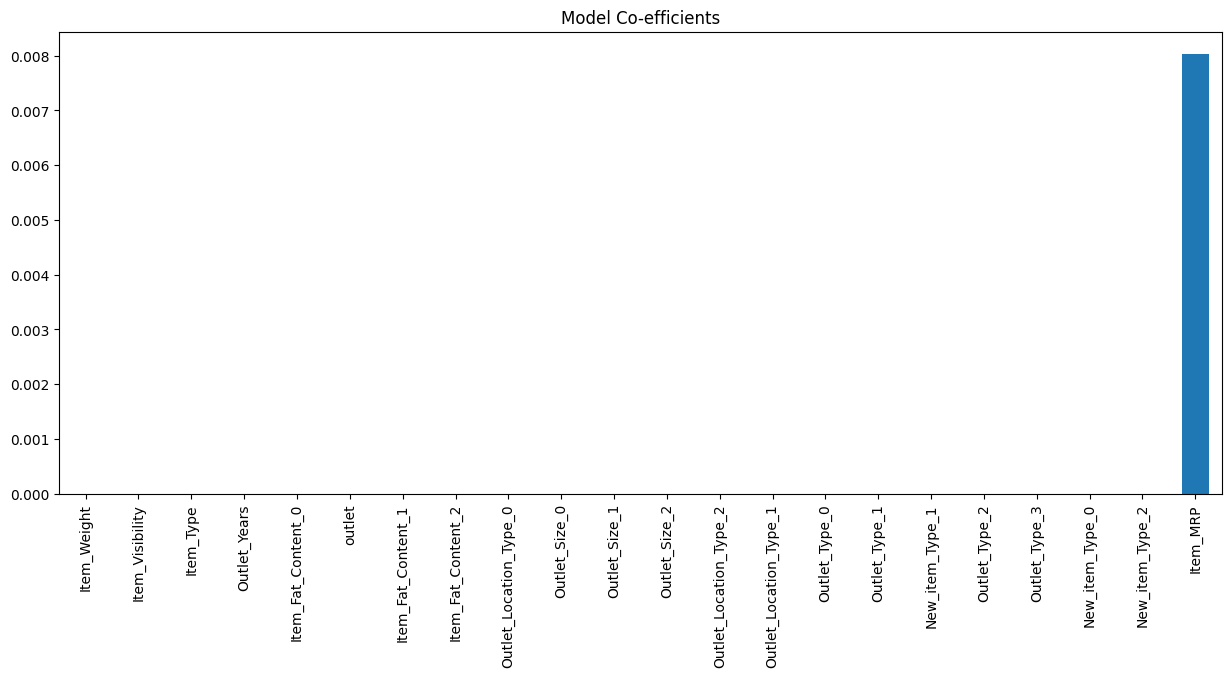

In [80]:
from sklearn.linear_model import Lasso
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
print(coef)
coef.plot(kind="bar", title="Model Co-efficients")
plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.56476653 -0.59775537 -0.5670264  -0.59871948 -0.54546692]
ABS Average of - neg_mean_squared_error 0.5747469411152112

R2 Score 
[0.45617125 0.42827455 0.4219207  0.3988841  0.49182659]
Average R2 Score  0.4394154387539265

Accuracy
Accuracy of Test data
R2_Score: 0.44647655351592475
Accuracy of Training data
R2_Score: 1.0
Accuracy of Complete data
R2_Score: 0.8300902464923753

Display actual and predicted values


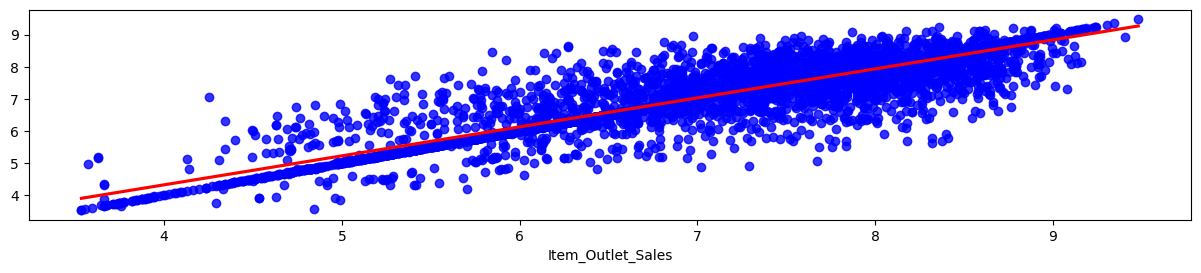

Outlet_Type_0             0.436607
Item_MRP                  0.351555
Item_Visibility           0.062613
Item_Weight               0.044614
Item_Type                 0.026607
Outlet_Years              0.020507
Outlet_Type_3             0.017598
outlet                    0.009696
Item_Fat_Content_2        0.004752
Item_Fat_Content_0        0.004371
Outlet_Location_Type_2    0.003611
New_item_Type_0           0.002734
Outlet_Size_2             0.002090
New_item_Type_1           0.002000
Outlet_Location_Type_0    0.001950
Outlet_Size_1             0.001800
Outlet_Location_Type_1    0.001543
New_item_Type_2           0.001375
Outlet_Type_2             0.001305
Item_Fat_Content_1        0.001239
Outlet_Type_1             0.000742
Outlet_Size_0             0.000691
dtype: float64


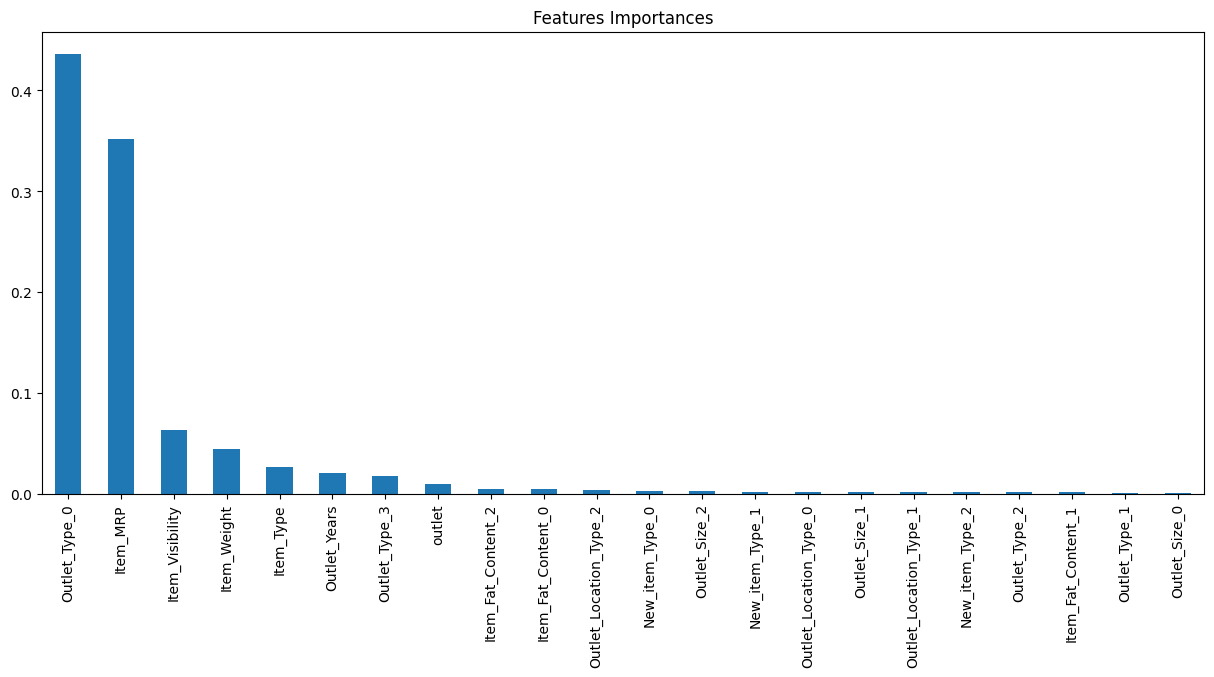

In [81]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
print(coef)
coef.plot(kind="bar", title="Features Importances")
plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.31470027 -0.31670425 -0.2963804  -0.313418   -0.29635123]
ABS Average of - neg_mean_squared_error 0.30751083206615426

R2 Score 
[0.7006857  0.69171723 0.69234194 0.69323366 0.72214109]
Average R2 Score  0.7000239242151306

Accuracy
Accuracy of Test data
R2_Score: 0.6960538013770434
Accuracy of Training data
R2_Score: 0.959450213673017
Accuracy of Complete data
R2_Score: 0.8785983280776436

Display actual and predicted values


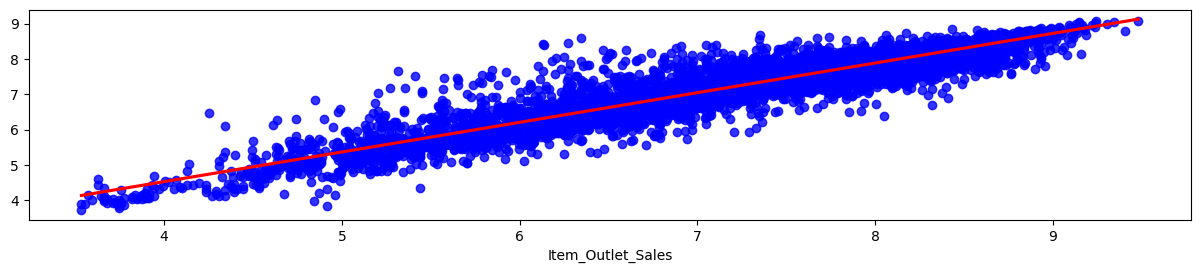

Outlet_Type_0             0.436448
Item_MRP                  0.348766
Item_Visibility           0.063044
Item_Weight               0.049581
Outlet_Years              0.024534
Item_Type                 0.024387
Outlet_Type_3             0.011557
outlet                    0.009775
Item_Fat_Content_0        0.004088
Item_Fat_Content_2        0.004054
Outlet_Location_Type_2    0.002815
New_item_Type_1           0.002660
New_item_Type_0           0.002625
Outlet_Size_2             0.002353
Outlet_Location_Type_1    0.002207
Outlet_Location_Type_0    0.002075
Outlet_Size_1             0.001922
Outlet_Type_2             0.001662
Item_Fat_Content_1        0.001575
New_item_Type_2           0.001565
Outlet_Type_1             0.001395
Outlet_Size_0             0.000913
dtype: float64


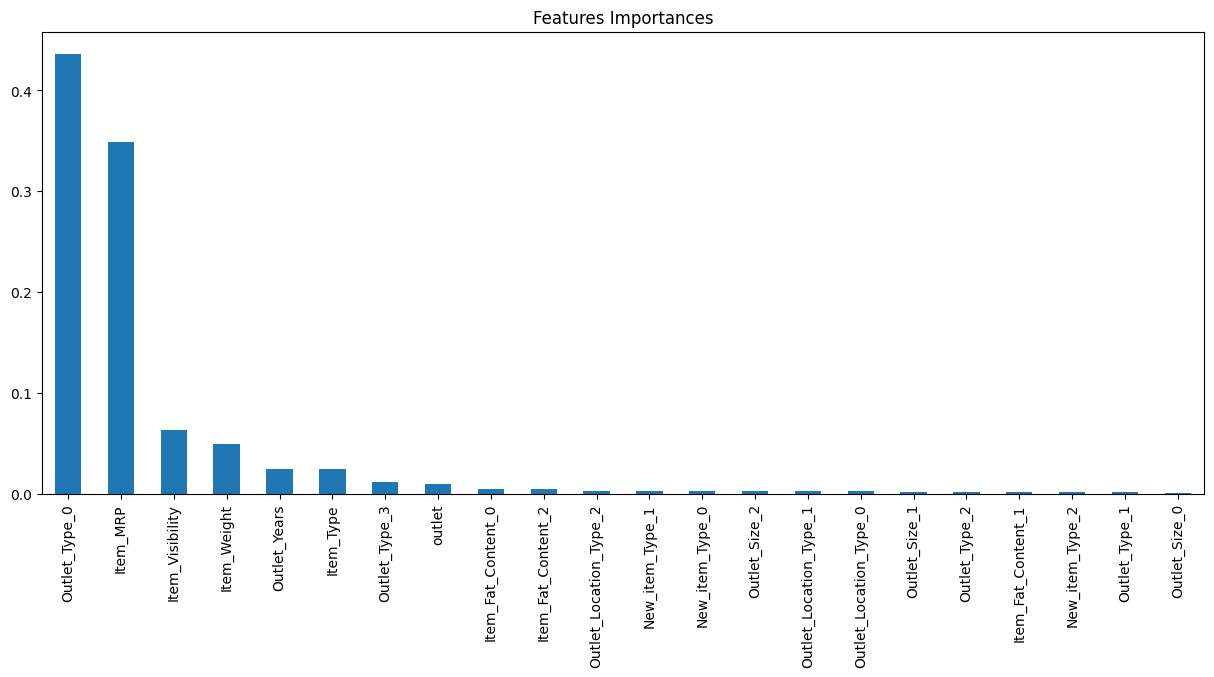

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
print(coef)
coef.plot(kind="bar", title="Features Importances")
plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.32958316 -0.33650321 -0.32025177 -0.33625232 -0.32079615]
ABS Average of - neg_mean_squared_error 0.32867732295366203

R2 Score 
[0.6859294  0.67533597 0.66920702 0.66612259 0.70165576]
Average R2 Score  0.6796501495036502

Accuracy
Accuracy of Test data
R2_Score: 0.6801267260936311
Accuracy of Training data
R2_Score: 1.0
Accuracy of Complete data
R2_Score: 0.9018115863594738

Display actual and predicted values


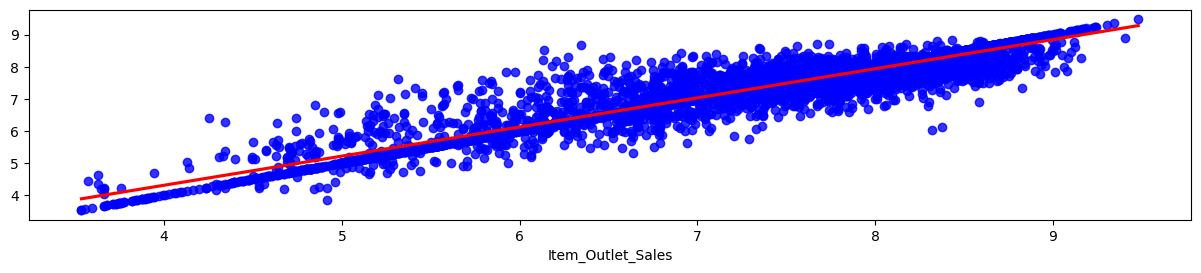

Outlet_Type_0             0.436607
Item_MRP                  0.329997
Item_Visibility           0.050272
Item_Weight               0.048100
Item_Type                 0.036125
Outlet_Type_3             0.026350
Outlet_Years              0.010501
outlet                    0.010148
Item_Fat_Content_2        0.007481
Item_Fat_Content_0        0.007333
New_item_Type_1           0.004893
New_item_Type_0           0.004617
Outlet_Location_Type_0    0.004075
Outlet_Location_Type_1    0.003619
Outlet_Location_Type_2    0.003223
Outlet_Size_2             0.003079
Outlet_Size_1             0.003020
New_item_Type_2           0.002872
Item_Fat_Content_1        0.002825
Outlet_Type_2             0.001680
Outlet_Type_1             0.001605
Outlet_Size_0             0.001578
dtype: float64


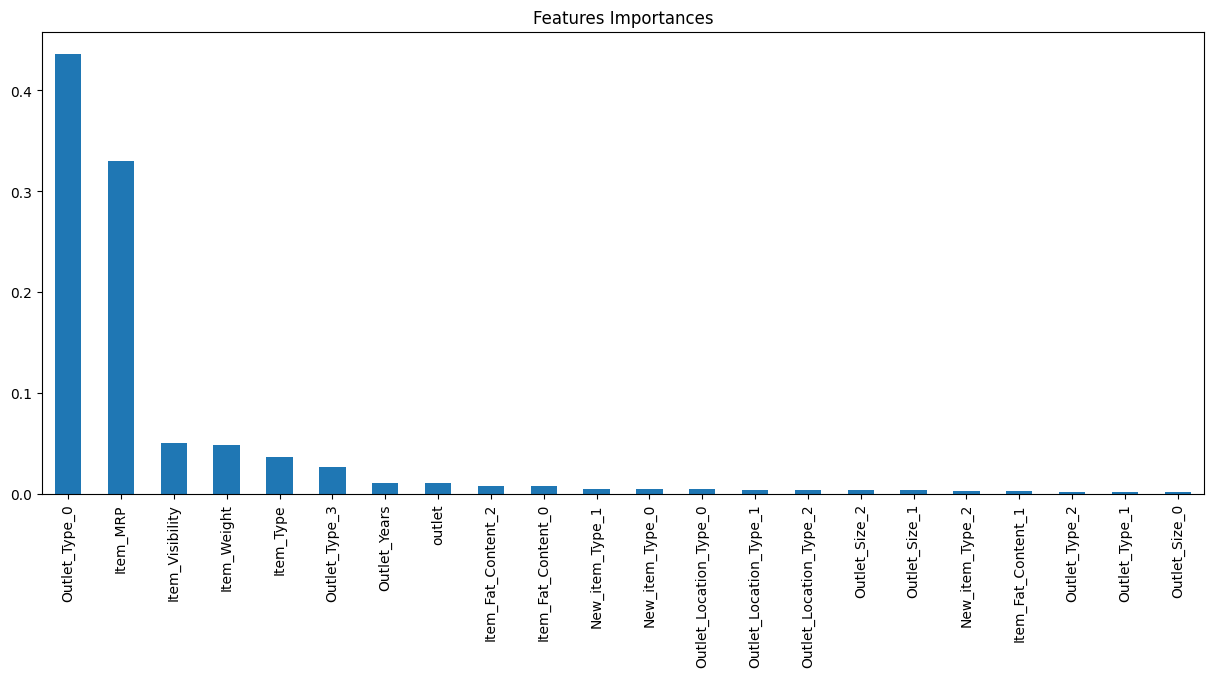

In [83]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
print(coef)
coef.plot(kind="bar", title="Features Importances")
plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 22
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 22
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `f

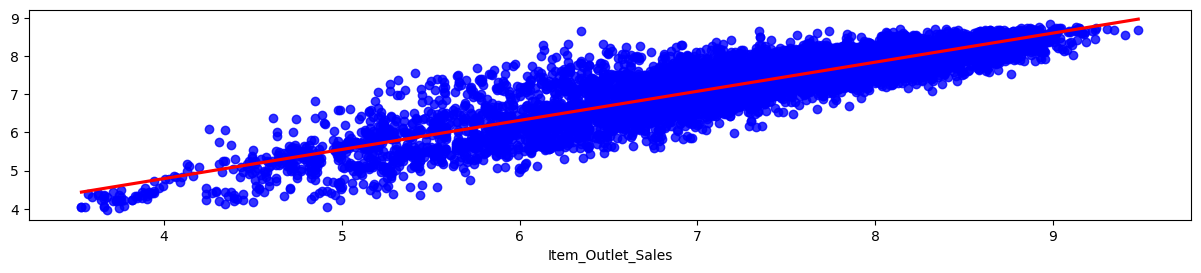

Item_MRP                  775
Item_Visibility           686
Item_Weight               585
Outlet_Years              292
Item_Type                 243
outlet                    136
Item_Fat_Content_0         51
Outlet_Type_0              46
Outlet_Location_Type_2     27
Item_Fat_Content_2         27
Outlet_Size_1              22
New_item_Type_0            22
Outlet_Size_2              20
Item_Fat_Content_1         17
Outlet_Type_1              15
New_item_Type_1            14
Outlet_Type_3               8
Outlet_Location_Type_0      7
Outlet_Location_Type_1      6
Outlet_Size_0               1
Outlet_Type_2               0
New_item_Type_2             0
dtype: int32


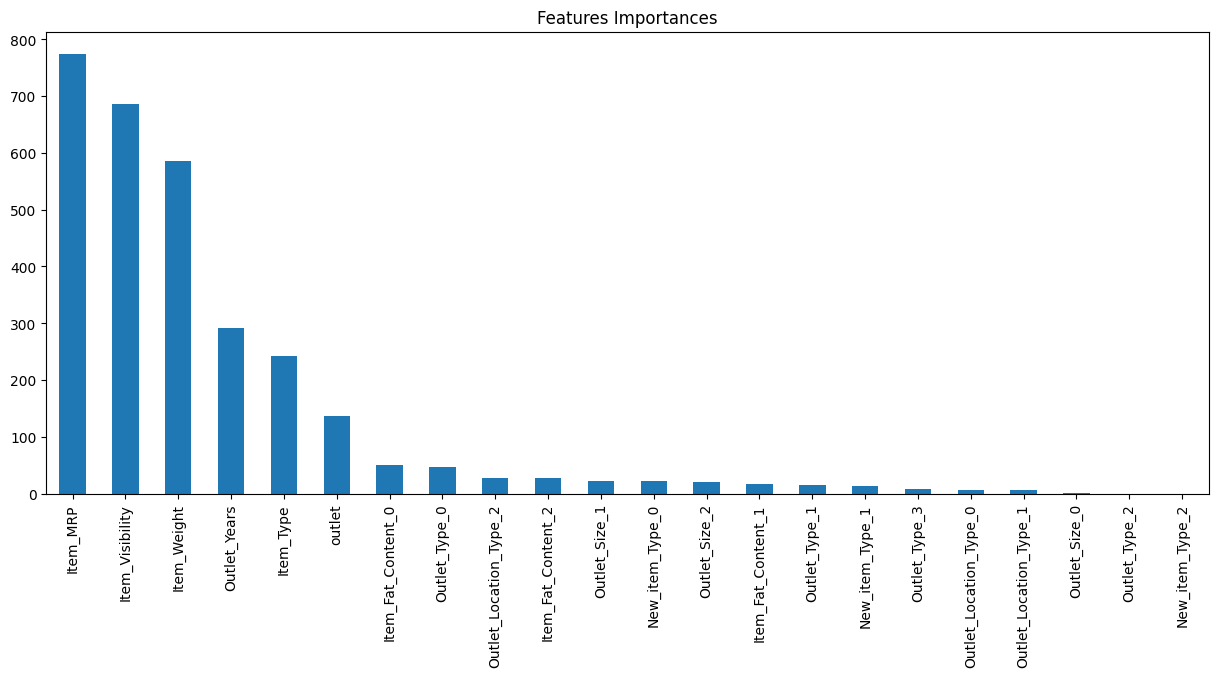

In [84]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
print(coef)
coef.plot(kind="bar", title="Features Importances")
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)


In [86]:
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf= [1,2,5,10]

In [87]:
random_grid = {"max_features": max_features, "max_depth":max_depth, "min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}
random_grid

{'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
rf = RandomForestRegressor()
rf = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring="neg_mean_squared_error", n_iter=10,
                        cv=5, verbose=2, random_state=42, n_jobs=-1)

In [90]:
display(rf.fit(X_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
-0.28543142048970493

Accuracy
Accuracy of Test data
R2_Score: 0.7122934847955285
Accuracy of Training data
R2_Score: 0.8275750592196316
Accuracy of Complete data
R2_Score: 0.7921897619604293

Display actual and predicted values


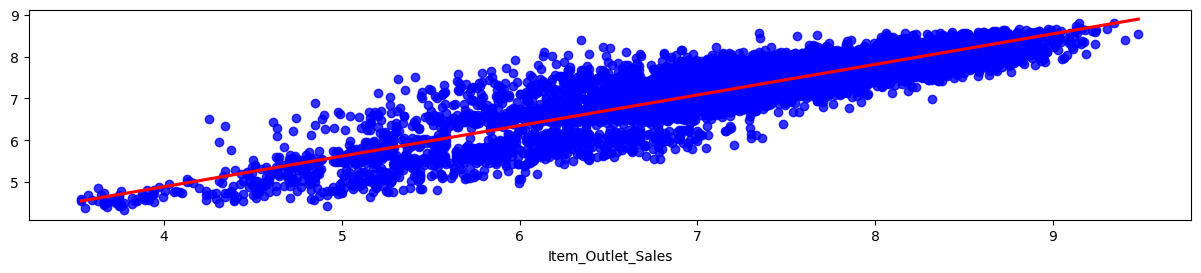

In [91]:
print(rf.best_params_)
print(rf.best_score_)

# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = rf.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = rf.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = rf.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()


In [92]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [93]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,
                         scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 22
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016A576CFE00>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016A576B61E0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A5AEEBCB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A5353E840>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016A5353E150>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'gamma': np.float64(0.22007624686980065), 'learning_rate': np.float64(0.06661147045343364), 'max_depth': 2, 'n_estimators': 107, 'subsample': np.float64(0.6137554084460873)}
-0.270486817430124

Accuracy
Accuracy of Test data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.7378840825312187
Accuracy of Training data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.7474040017170538
Accuracy of Complete data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.7444840723233541

Display actual and predicted values


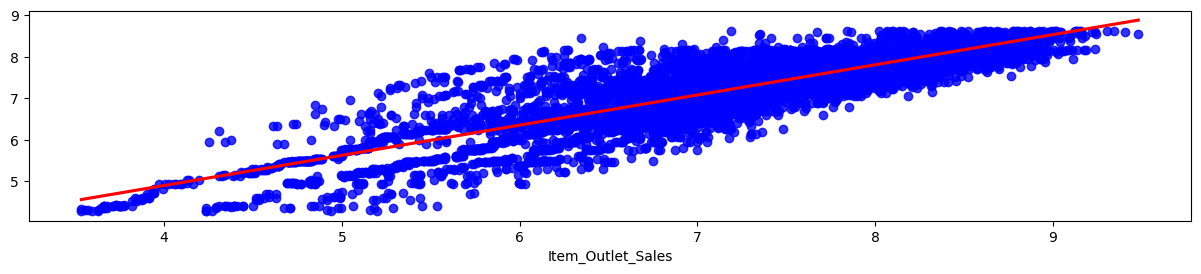

In [94]:
print(lgb.best_params_)
print(lgb.best_score_)

# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = lgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = lgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = lgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()

In [100]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [98]:
from xgboost import XGBRegressor
xgb = RandomizedSearchCV(estimator =XGBRegressor() , param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.2s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.2s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.2s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016A57825070>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A57639CA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A5353D310>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016A5AE9BB00>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'gamma': np.float64(0.22007624686980065), 'learning_rate': np.float64(0.06661147045343364), 'max_depth': 2, 'n_estimators': 107, 'subsample': np.float64(0.6137554084460873)}
-0.26945651877072835

Accuracy
Accuracy of Test data
R2_Score: 0.7391462915552081
Accuracy of Training data
R2_Score: 0.7472569668211906
Accuracy of Complete data
R2_Score: 0.7447696207847848

Display actual and predicted values


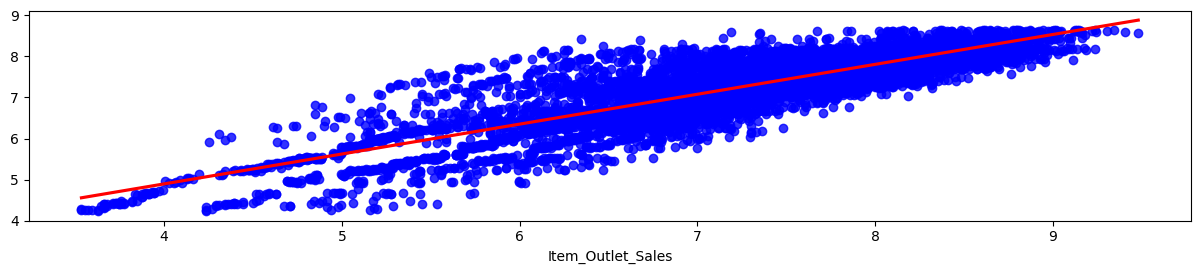

In [101]:
print(xgb.best_params_)
print(xgb.best_score_)

# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = xgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = xgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = xgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()

In [ ]:
""